In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
path="/content/drive/MyDrive/Crime_Pred/Chicago_Crimes_2012_to_2017.csv"
chicago_df=pd.read_csv(path)
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [49]:
chicago_df.shape

(1456714, 23)

In [50]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [51]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


<Axes: >

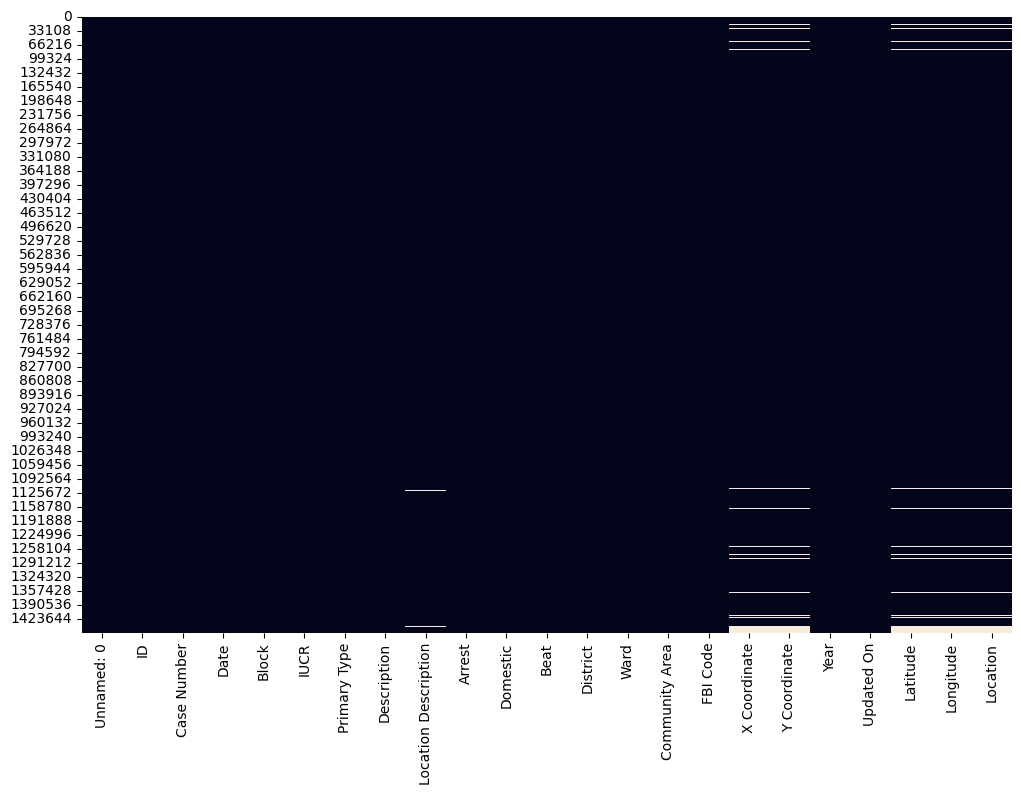

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(chicago_df.isnull(),cbar=False)

In [53]:
chicago_df.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate','Y Coordinate','Updated On','Year','Ward','Beat','Latitude','Longitude','Year','FBI Code','Community Area','Location','District'],inplace=True,axis=1)

In [54]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [55]:
chicago_df.Date = pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [56]:
chicago_df.Date

,Date
0,2016-05-03 23:40:00
1,2016-05-03 21:40:00
2,2016-05-03 23:31:00
3,2016-05-03 22:10:00
4,2016-05-03 22:00:00
...,...
1456709,2016-05-03 23:33:00
1456710,2016-05-03 23:30:00
1456711,2016-05-03 00:15:00
1456712,2016-05-03 21:07:00


In [57]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [58]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2016-05-03 23:40:00,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 21:40:00,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2016-05-03 23:31:00,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
2016-05-03 22:10:00,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
2016-05-03 22:00:00,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [59]:
chicago_df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,329460
BATTERY,263700
CRIMINAL DAMAGE,155455
NARCOTICS,135240
ASSAULT,91289
OTHER OFFENSE,87874
BURGLARY,83397
DECEPTIVE PRACTICE,75495
MOTOR VEHICLE THEFT,61138


In [60]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION'],
      dtype='object', name='Primary Type')

In [61]:
order = chicago_df['Primary Type'].value_counts().iloc[:15].index.drop_duplicates()

<Axes: xlabel='count', ylabel='Primary Type'>

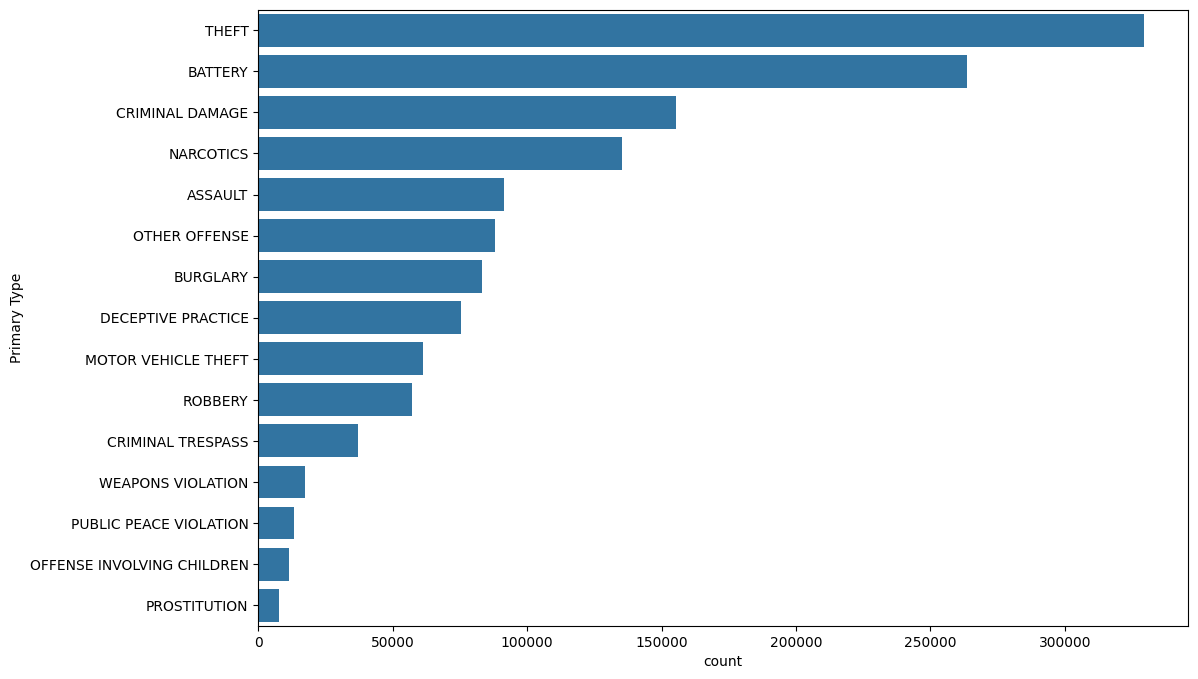

In [62]:
chicago_df = chicago_df.reset_index(drop=True)
order = chicago_df['Primary Type'].value_counts().iloc[:15].index.drop_duplicates()
plt.figure(figsize=(12,8))
sns.countplot(y='Primary Type', data=chicago_df, order=order)

<Axes: xlabel='count', ylabel='Location Description'>

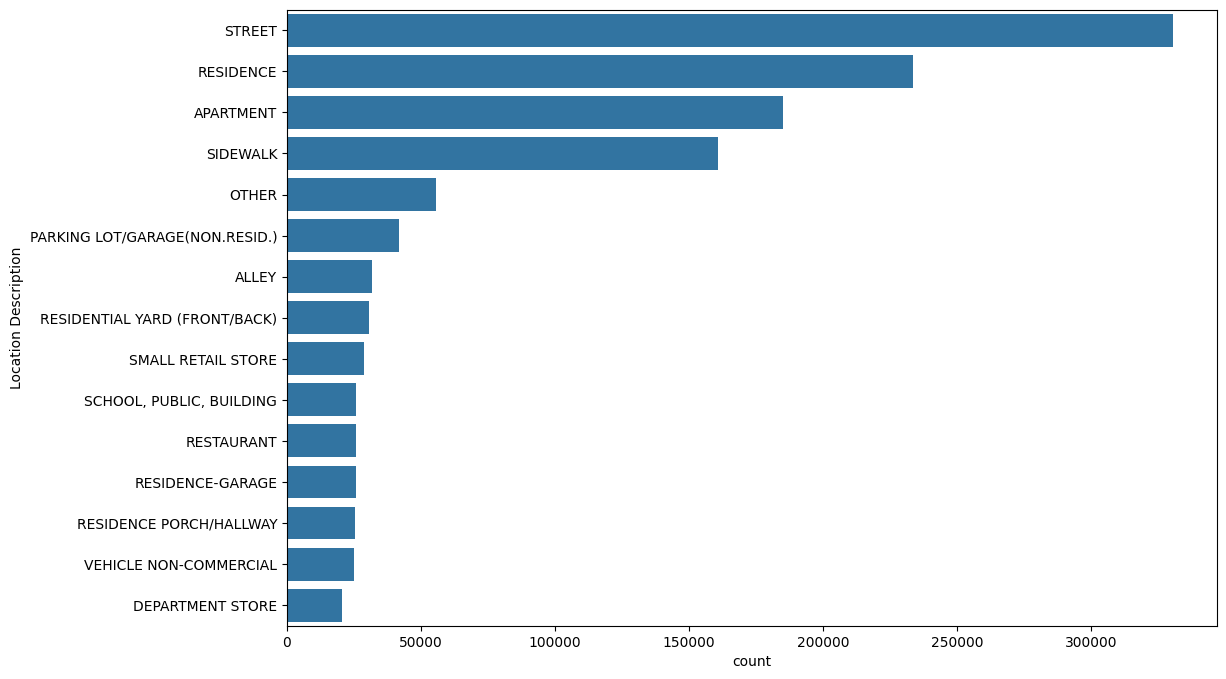

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(y='Location Description',data=chicago_df,order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [64]:
chicago_df = chicago_df.set_index('Date')
chicago_df.resample('YE').size()


,0
Date,
2012-12-31,335670
2013-12-31,306703
2014-12-31,274527
2015-12-31,262995
2016-12-31,265462
2017-12-31,11357


<ipython-input-66-61f88057f88b>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


Text(0, 0.5, 'Number of crimes')

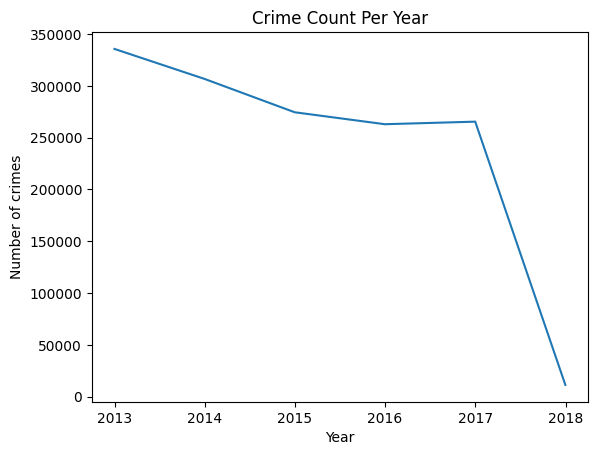

In [66]:
plt.plot(chicago_df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Year")
plt.ylabel("Number of crimes")


<ipython-input-67-5eb7ddd25ab0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


Text(0, 0.5, 'Number of crimes')

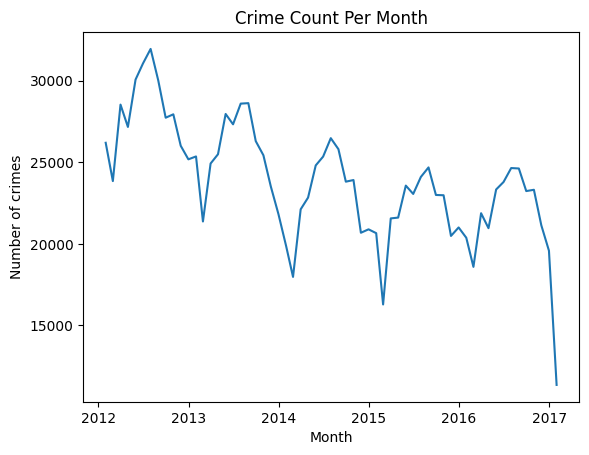

In [67]:
plt.plot(chicago_df.resample('M').size())
plt.title("Crime Count Per Month")
plt.xlabel("Month")
plt.ylabel("Number of crimes")


<ipython-input-68-adbae89a4d86>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


Text(0, 0.5, 'Number of crimes')

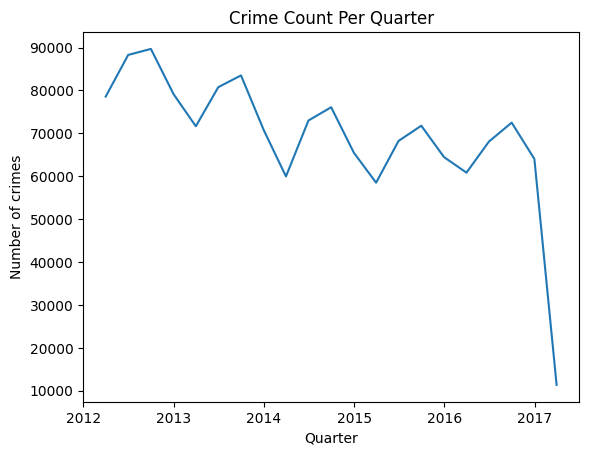

In [68]:
plt.plot(chicago_df.resample('Q').size())
plt.title("Crime Count Per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of crimes")


In [69]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

<ipython-input-69-406ed1a9b398>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_df.resample('M').size().reset_index()


In [70]:
chicago_prophet

,Date,0
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [71]:
chicago_prophet.columns=['Date','Crime Count']

In [72]:
chicago_prophet

,Date,Crime Count
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [76]:
chicago_prophet_final=chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [77]:
chicago_prophet_final

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [78]:
m=Prophet()
m.fit(chicago_prophet_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmyxq8fo/wp4brobr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmyxq8fo/wf_3v91_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97304', 'data', 'file=/tmp/tmpvmyxq8fo/wp4brobr.json', 'init=/tmp/tmpvmyxq8fo/wf_3v91_.json', 'output', 'file=/tmp/tmpvmyxq8fo/prophet_modelew04s22m/prophet_model-20241210185241.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:52:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [99]:
future=m.make_future_dataframe(periods=700)

In [100]:
forecast=m.predict(future)

In [101]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29528.009355,25906.615673,28309.855067,29528.009355,29528.009355,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,0.0,0.0,0.0,27059.541749
1,2012-02-29,29341.464246,23374.978918,25849.744293,29341.464246,29341.464246,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,0.0,0.0,0.0,24642.586441
2,2012-03-31,29142.053956,27059.444337,29387.438288,29142.053956,29142.053956,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,0.0,0.0,0.0,28179.268999
3,2012-04-30,28949.076258,25984.522869,28439.555003,28949.076258,28949.076258,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,0.0,0.0,0.0,27204.563881
4,2012-05-31,28749.665970,28451.488210,30876.235855,28749.665970,28749.665970,923.695781,923.695781,923.695781,923.695781,923.695781,923.695781,0.0,0.0,0.0,29673.361751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2018-12-28,19460.494705,18291.922393,20778.500363,19148.774759,19760.940183,84.041895,84.041895,84.041895,84.041895,84.041895,84.041895,0.0,0.0,0.0,19544.536600
757,2018-12-29,19457.794759,17206.540444,19807.001157,19145.627060,19758.491729,-947.242438,-947.242438,-947.242438,-947.242438,-947.242438,-947.242438,0.0,0.0,0.0,18510.552320
758,2018-12-30,19455.094812,16428.749210,19141.333362,19142.479360,19756.110787,-1713.450413,-1713.450413,-1713.450413,-1713.450413,-1713.450413,-1713.450413,0.0,0.0,0.0,17741.644399
759,2018-12-31,19452.394866,15887.520921,18420.870692,19139.331660,19753.906369,-2186.771657,-2186.771657,-2186.771657,-2186.771657,-2186.771657,-2186.771657,0.0,0.0,0.0,17265.623209


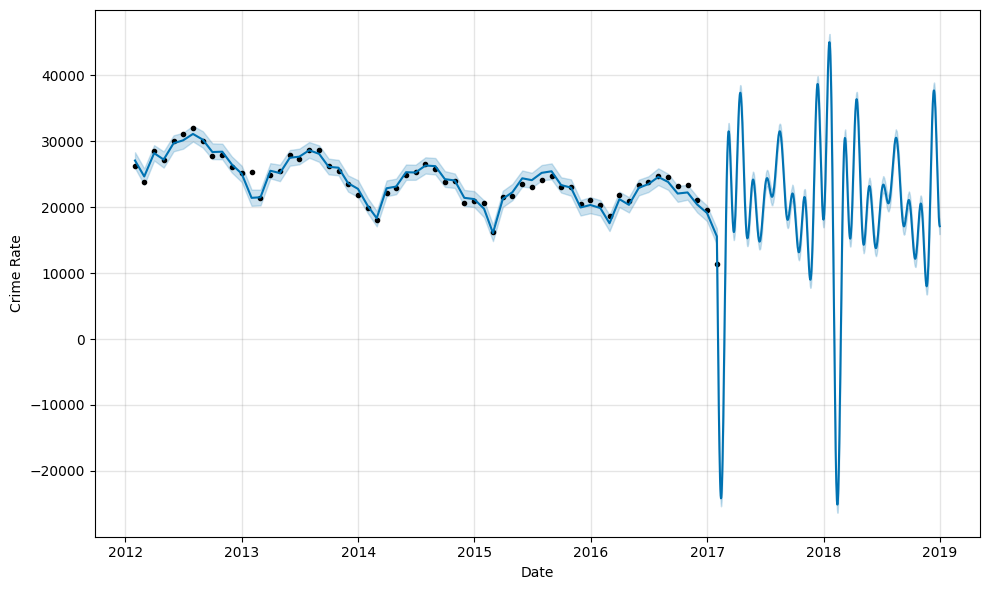

In [102]:
figure=m.plot(forecast,xlabel='Date',ylabel='Crime Rate')

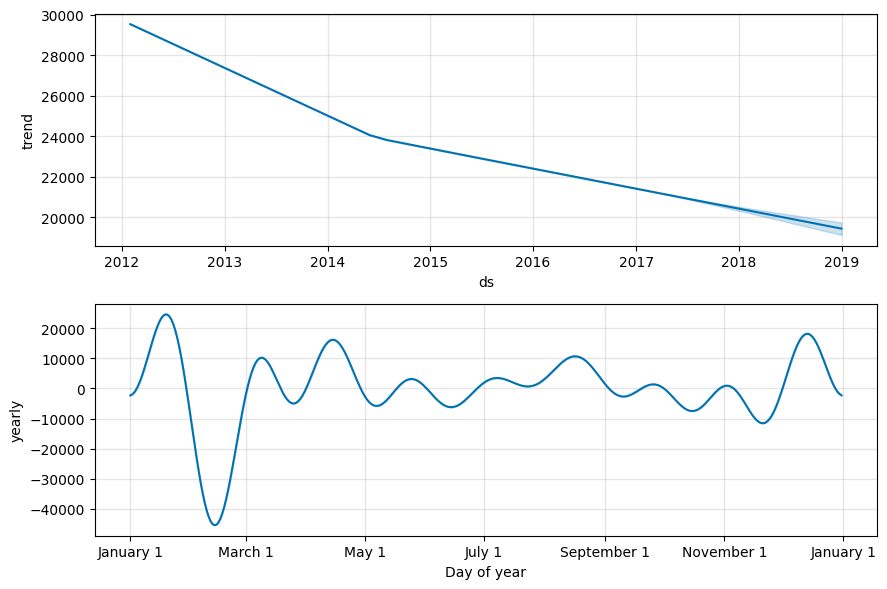

In [103]:
figure=m.plot_components(forecast)